# Exploratory Data Analysis

**Team:** XOH - SOOMI OH, YOO MI OH

**Date:** February 26 2026  

---

## 1. Executive Summary

### Project Objective

Predicting 2026 World Cup performance requires moving beyond FIFA rankings and recent 
results to answer three interconnected questions simultaneously:

1. **Individual Quality:** Who are the players, how reliable is their output, and are 
they performing at their peak entering 2026?
2. **Tactical Identity:** What kind of team do they form, how consistent is that identity 
under tournament pressure, and which archetype does the data actually confirm?
3. **Contextual Fit:** How do host advantage, confederation travel, managerial stability, 
and club cohesion shape a squad's probability of deep tournament progression?

To answer these questions, we are building a **three-layer analytical system** grounded 
in StatsBomb open event and 360 spatial tracking data:

- **Layer 1 — Tactical DNA:** 8 team dimensions aggregated from 2022 and 2024 major 
tournaments, capturing collective behaviour across pressing, possession, progression, 
territorial dominance, and defensive structure
- **Layer 2 — Player Quality:** 12 player dimensions spanning 2021–2025, time-decay 
weighted to prioritise recent form, evaluated within positional archetypes rather than 
on a universal composite scale
- **Layer 3 — Readiness Score:** A single auditable score per nation synthesising 
tactical identity and player quality with contextual adjustment factors

### From Raw Data to Football Intelligence

Before the tactical and player frameworks could be built, the raw data required 
significant structural validation. The foundational EDA across 12.2M events, 3,464 
matches, 165,820 lineup entries, and 360 spatial tracking records surfaced four 
decisions that directly shaped the pipeline architecture. 

- **The StatsBomb Legacy Spike:** Over 50% of club match records originate from the 
2015/16 window — a byproduct of historical data availability rather than genuine match 
volume. With 748 matches from a specific La Liga era, integrating this period would bias 
the model toward low-tempo possession metrics and obsolete tactical benchmarks. The 
pipeline is restricted to the **post-2021 cycle** to ensure outputs reflect the current 
"8-second transition" meta rather than the tiki-taka era.

- **Event-Stream Architecture:** The 12.2M event dataset averages 3,519 actions per 
match across 35 unique event types, with 49.4% of records capturing progression and 
possession actions and 12% capturing defensive intensity. This action-rich, agency-based 
architecture allows the model to be **tactically diagnostic** rather than merely 
descriptive — mapping the functional connective tissue of team behaviour rather than 
physical output alone.

- **The Super-Sub Trap:** Starters average 84.7 minutes versus 21.5 minutes for 
substitutes. Evaluating both on a pure per-90 basis creates an artificial performance 
ceiling where a 10-minute cameo against a fatigued defence produces "elite" metrics that 
are physically unsustainable across a full match. A **270-minute minimum threshold** is 
implemented to filter for foundation players with proven aerobic and tactical consistency.

- **360 Data as the Tactical North Star:** With 9.3% match coverage (323/3,464 matches), 
exclusively tournament-focused, the 360 spatial data is treated as a **standalone 
validation set** rather than integrated into the longitudinal pipeline. It defines the 
mathematical standard for line-breaking passes and spatial dominance in the modern 
game — used to calibrate Avg Packing thresholds with a level of spatial accuracy that 
event data alone cannot provide.

### Key Findings from the Metric EDA

**Team-Level Tactical Framework (8 Dimensions):**
- All 8 tactical dimensions confirmed non-redundant with a maximum inter-feature 
correlation of 0.61, justifying full feature retention
- Four empirically distinct archetypes visible in the data: **Proactive Dominant, 
Possession-Adaptive, Elite Pragmatist, and Tactically Rigid** — each with statistically 
different match win rates (29%–42%) and tournament depth profiles
- Counterintuitively, the highest match win rate (42%) belongs to **Low Press / High 
Possession** sides — not the high-pressing mainstream meta
- Cross-tournament radar analysis confirms a **global scaler is statistically 
defensible** — tactical distributions across WC 2022, Euro 2024, Copa América, and AFCON 
converge sufficiently to treat all nations within the same tactical universe
- Volatility mapping identifies **Argentina, Germany, and Spain** as deliberate tactical 
chameleons — high possession variance paired with controlled pressing variance signals 
elite adaptability, not instability

**Player-Level Quality Framework (12 Dimensions):**
- 12 metrics confirmed non-redundant with a maximum inter-metric correlation of 0.63
- **Team Involvement %** is the most orthogonal metric (r = −0.03 with xG Chain) — 
presence and danger are entirely decoupled signals requiring independent scoring
- **Avg Packing** (StatsBomb 360) has a median of 0.00 — zero-inflation makes it the 
most powerful specialist differentiator and the most dangerous metric to mis-handle; 
log transformation is mandatory before scaling
- Elite evaluation requires **four simultaneous corrections** absent from conventional 
scouting: intra-archetype percentiles, temporal reliability gating, zero-inflation 
handling, and volatility tolerance for knockout format contexts

### Midterm Status & Remaining Work

The raw data validation, metric engineering, and exploratory analysis phases are 
complete. Both evidence streams are validated, documented, and pipeline-ready. The three 
remaining components to be delivered in the final report are:

- **Tactical Clustering (Section III):** K-Means architecture (k=4) classifying all 48 
qualified nations into empirically grounded archetypes, validated against historical 
tournament outcomes
- **Player Quality Scoring (Section IV):** Archetype-specific, shrinkage-corrected, 
volatility-tolerant scoring engine generating a ranked quality score for every player 
in the 2026 squad pool
- **The Readiness Score (Section V):** Synthesis of tactical identity and player quality 
into a single auditable score per nation, adjusted for managerial stability, club 
cohesion, host advantage, and confederation travel factors

### Key Insight

> Tournament success is non-linear with quality. The data confirms that tactical 
> archetype, player reliability, and contextual fit interact in ways that FIFA rankings 
> cannot capture. A world-class squad in the wrong tactical system, or a consistent team 
> without a volatile match-winner, will underperform their rating. Our framework is 
> designed to quantify exactly that gap — between perceived quality and 
> tournament-ready performance.

---
> For detailed analysis, methodology, and supporting visualizations, see **`EDA_midterm_xoh.ipynb`**.

## 2. Data Retrieval

### Data Sources

We use the **StatsBomb Open Data** dataset, accessed via the official template repository 
scripts:

| Dataset | Records | Coverage | Key Metrics |
|---------|---------|----------|-------------|
| **Matches** | 3,464 matches | 21 competitions, 1958-2025 | Competition, temporal, outcomes |
| **Events** | 12.2M events | 35 event types, 99.25% location | Tactical actions, xG, passes |
| **Lineups** | 165,820 records | 10,808 players, 25 positions | Player pool, participation |
| **360° Tracking** | 15.6M records | 323 matches (9.3%) | Spatial data (limited) |

### Processing Architecture

Raw data is merely potential. To convert these four disparate datasets into the 8 
tactical dimensions and 12 player quality metrics that power the prediction model, we 
built a purpose-designed processing pipeline with two core components.

To handle the scale of the data, we utilise **DuckDB** — an in-process analytical 
database that enables SQL-based aggregation directly over Parquet files. This approach 
bypasses the memory overhead of loading the full 12.2M row event dataset into memory, 
ensuring high analytical throughput without sacrificing reproducibility. Where 
in-memory transformation is required, the pipeline employs a **hybrid Pandas / Polars 
architecture** — Polars for high-performance lazy evaluation and multi-threaded 
aggregation across large season-level files, Pandas for compatibility with visualisation 
and statistical libraries in the EDA layer. This combination optimises both computational 
efficiency and analytical flexibility across the pipeline.

The pipeline is orchestrated via a centralised entry point, `run_metrics.py`, which 
executes all metric computations in sequence and outputs results to a structured 
`/processed` directory. By isolating each scope (tournament or season folder) and metric 
(individual file), the pipeline remains **efficient, reproducible, and auditable** — 
a prerequisite for downstream consumption by both the player quality engine and the 
tactical clustering system.

The output of this pipeline is two validated evidence streams:
- **8 team tactical dimensions** aggregated at match and tournament level from 2022-2024 
major international tournaments
- **12 player quality dimensions** aggregated at player-season level across the 
2021-2025 rolling window, time-decay weighted to prioritise recent form

---

## 3. General Dataset Overview

### 3.1 Match Data: Temporal Distribution & The Case for Recency

#### Dataset at a Glance
- **3,464 matches** across 21 competitions
- **Temporal:** 54% concentrated in 2015-2016 (1,860 matches. Pre-2015: 425 scattered matches. Post-2016: 1,179 matches over 8 years.
- **Competitions:** La Liga 25%, Ligue 1 13%, Premier League 12%, Serie A 11%, Bundesliga 10%, Women's football 9.4%.
- **Outcomes:** 45.2% home wins, 23.0% draws, 31.8% away wins. 2.85 goals/match average.
- **Quality:** No duplicate IDs. Missing data limited to non-essential fields.

The longitudinal dataset spans 1958-2025 but its distribution reveals three distinct 
phases that directly shape the pipeline's temporal scope:

**1. The Legacy Spike (2015-2016):** The dataset peaks at ~1,800 matches, driven by early 
StatsBomb data releases rather than genuine match volume growth. With 748 matches 
originating from a single La Liga era, integrating this period would over-index the 
model on high-volume, low-tempo possession metrics a decade removed from the current 
gam, and render benchmarks structurally obsolete through regime decay. This is the 
period the pipeline explicitly excludes.

**2. The Sparsity Canyon (2017-2020):** Following the 2016 peak, the dataset enters a 
period of extreme thinness, nsufficient volume and compositional diversity to anchor 
reliable tactical benchmarks for 2026 projection.

**3. The Modern Meta (2021-2025):** Post-2021 data volume recovers with a fundamentally 
different compositional profile. Unlike the league-heavy 2015 era, this window is 
weighted toward international tournaments (including 2022 FIFA World Cup, and 2024 UEFA Euro and AFCON), environments that most directly simulate 
2026 conditions and act as the primary meta-shifters of global tactics.

By identifying the Legacy Spike as a structural artifact and the 2017-2020 gap as a 
loss of statistical signal, the mandate is clear: **the 2021-2025 window is the only 
valid blueprint for 2026.** The pipeline trades the comfort of 2015's raw volume for 
the accuracy of the current tournament-heavy, high-intensity meta.

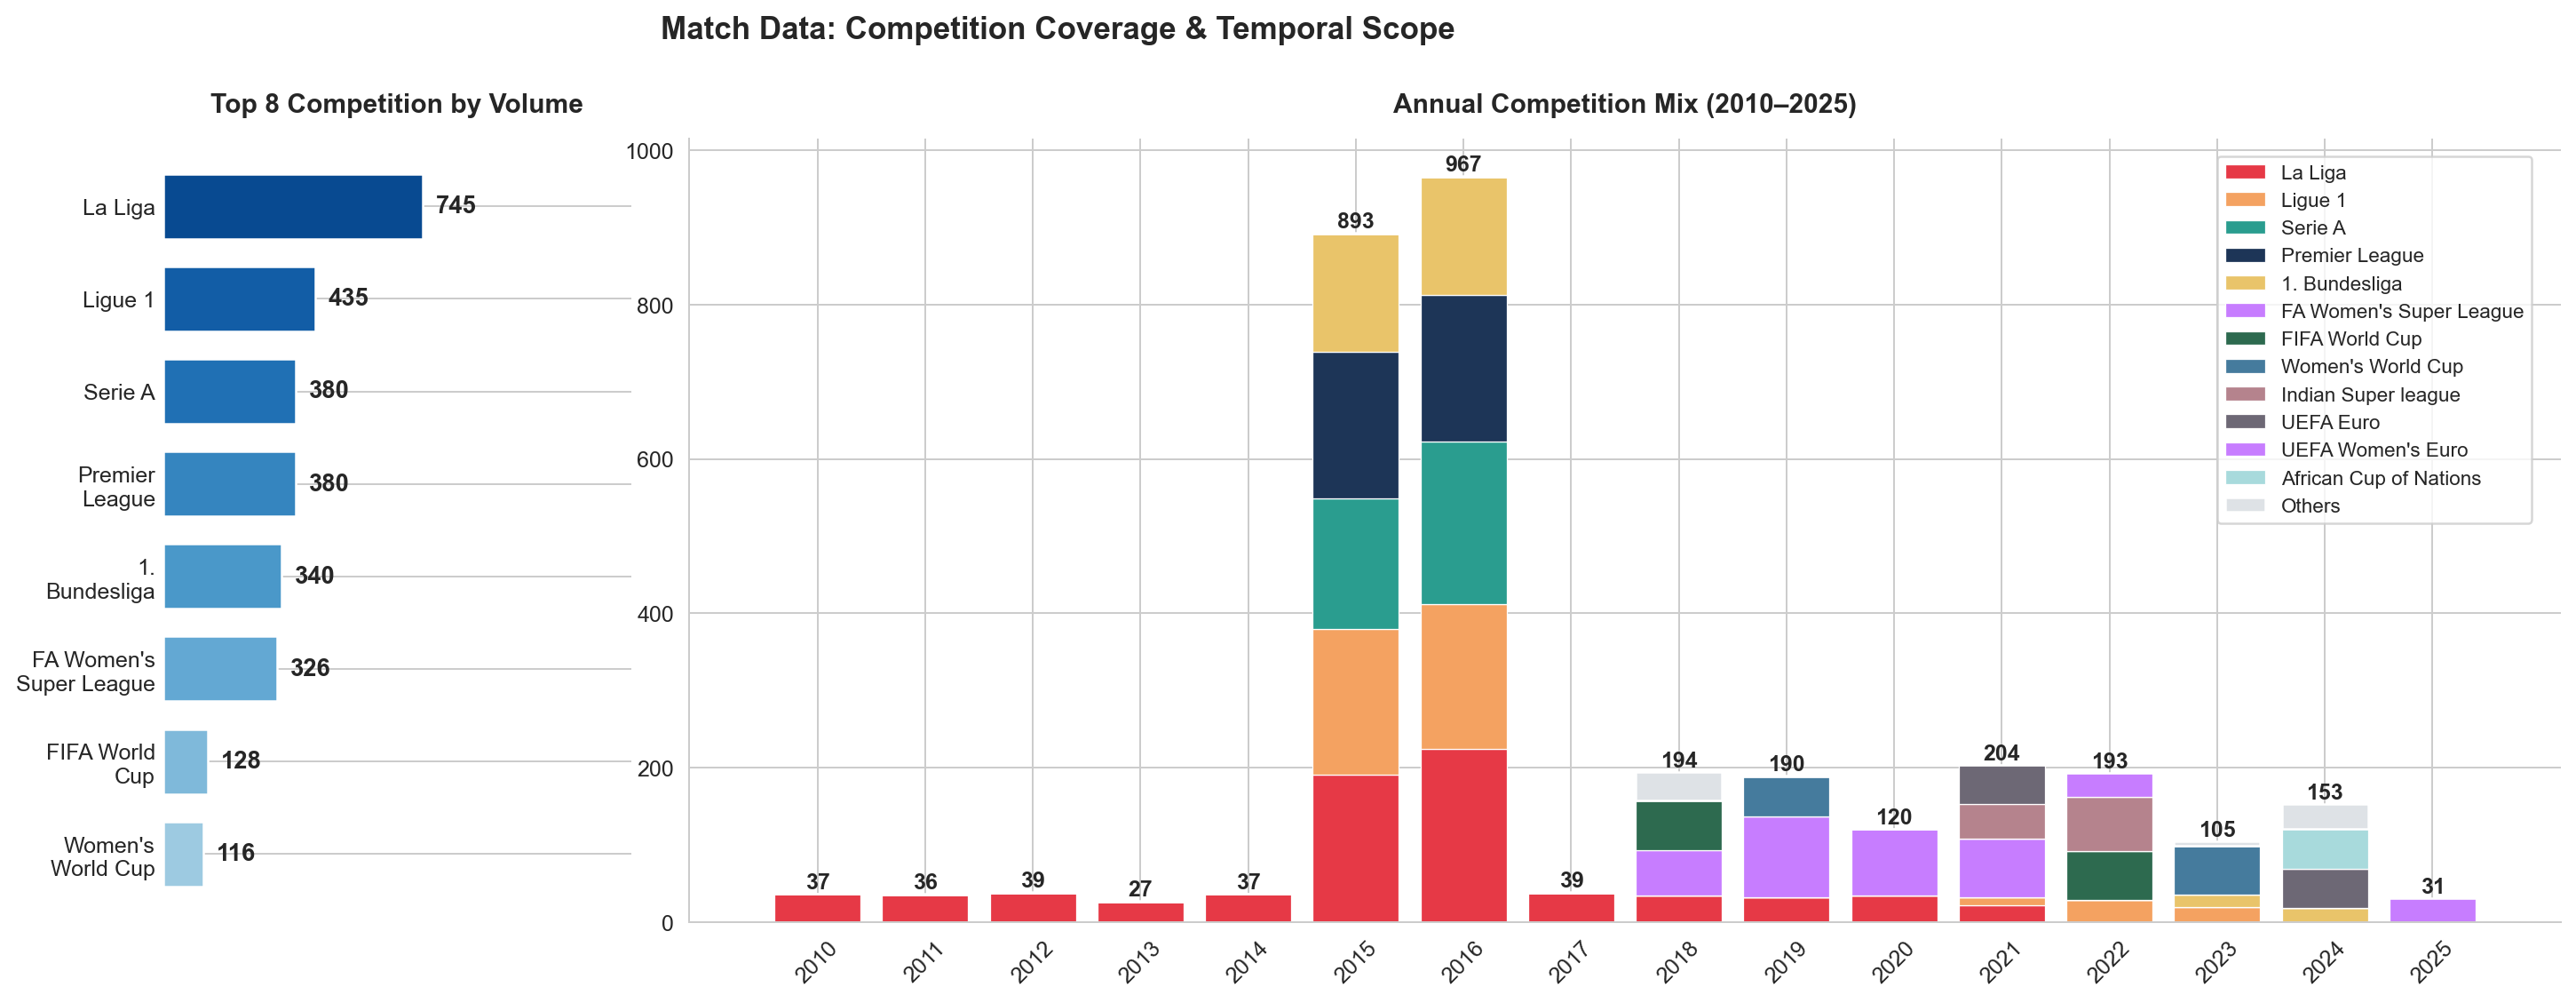

In [5]:
from IPython.display import Image, display
display(Image(filename='figures/matches_overview.png'), width=300)

### 3.2 Event Data: The Pulse of the Game

#### Dataset at a Glance
- **12,188,949 events** across 3,464 matches
- **Distribution:** Pass 27.8%, Ball Receipt 26.0%, Carry 21.6%, Pressure 9.1%, Shot 0.7%
- **Barcelona bias:** 10.2% of all events. Top 10 players all Barcelona 2010s (Messi, Busquets, Xavi, Iniesta).
- **Shot quality:** 9,383 total xG across 88,023 shots (0.107 avg). Only 8.1% qualify as big chances (xG > 0.3). Median 0.055 suggests many speculative efforts.
- **Passes:** 77.7% completion rate
- **Temporal:** 50.4% first half, 49.2% second half
- **Quality:** No duplicate IDs. 99.25% have location data. 20.9% under pressure.

The StatsBomb event dataset contains **12.2M discrete actions across 3,464 matches**, 
averaging 3,519 events per game across 35 unique event types. Unlike synchronous GPS 
tracking data, which records spatial coordinates alone, event-stream data captures 
**player agency and tactical decision-making** — encoding not just where a player is, 
but what they chose to do and why.

The distribution is heavily weighted toward high-leverage tactical actions:

**1. Progression & Possession (49.4%):** Passes (27.8%) and Carries (21.6%) form the 
backbone of the dataset, providing dense coverage of build-up phases and zone-to-zone 
transitions across all defensive structures.

**2. Defensive Intensity (12%):** Pressures (9.1%), Interceptions, and Clearances 
quantify defensive proactivity, encoding the high-press DNA of modern football in a 
way that GPS tracking data often fails to capture.

**3. Shooting (0.7%):** Low in volume but structurally sufficient. Shots are rare events 
in elite football, and the dataset's xG annotations provide the finishing and threat 
generation signal required for both team and player-level metrics.

#### Metric Coverage Validation

| Metric Type | Event Source | Coverage | Status |
|-------------|-------------|----------|--------|
| Possession | Pass + Carry | 49.4% | ✅ Excellent |
| Progression | Pass + Carry + Location | 49.4% | ✅ Excellent |
| Defense | Pressure + Interception + Clearance | 12% | ✅ Good |
| Shooting | Shot + xG | 0.7% | ✅ Sufficient |

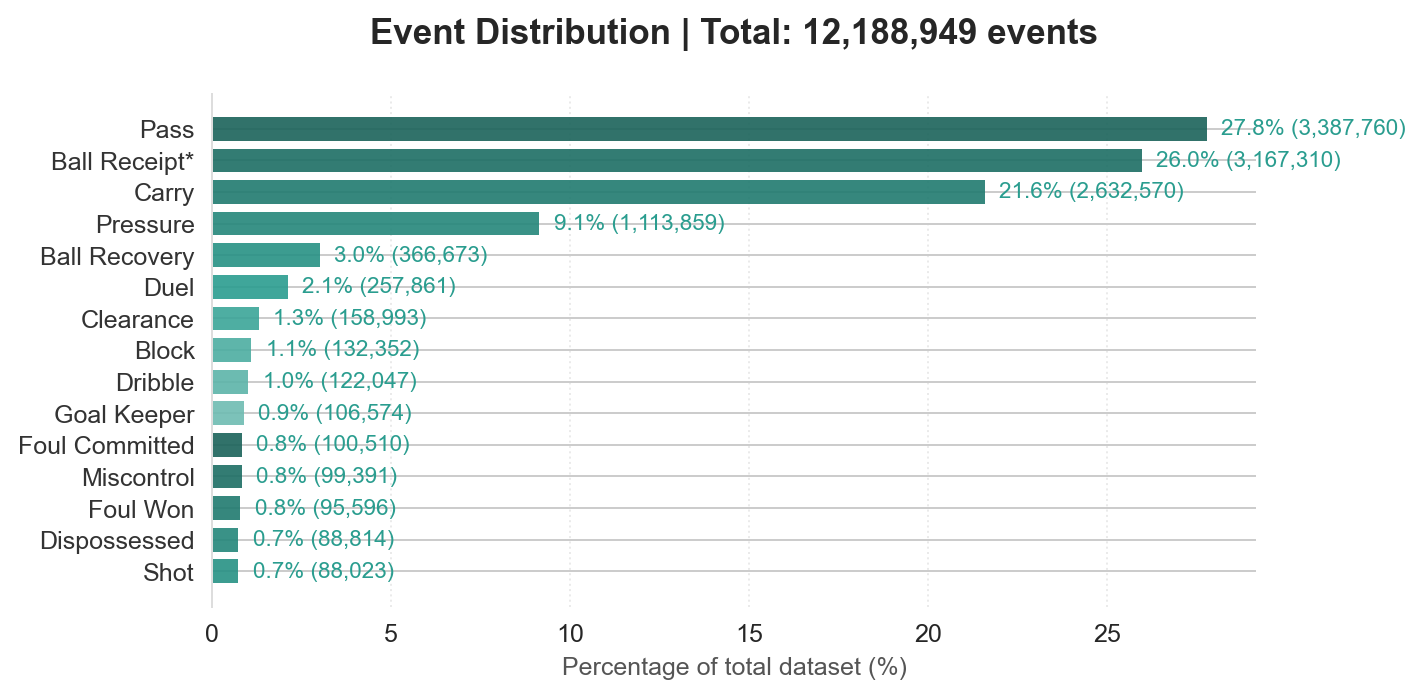

In [9]:
display(Image(filename='figures/event_type_dis.png'), width=100)

## 3.3 Lineup Data: Who Was on the Pitch
#### Dataset at a Glance
- **165,820 entries** across 3,464 matches with 10,808 unique players identified.
- **Participation:** 58.3% of the recorded lineup entries actually saw game time (96,698 players/instances).
- **Substitutions:** 5.9 avg per match. Starters averaged 84.7 min, while substitutes averaged 21.5 min of playing time.
- **Playing Time:** 55.8% played 90+ min, 18.5% played 60-90 min, 9.0% played 30-60 min, and 16.7% played under 30 min.
- **Cards:** 19,606 total cards (11.8% of records). 96.5% were Yellow Cards. Sergio Busquets leads the disciplinary table with 130 cards.
- **Quality:** 60,491 duplicate (match_id, player_id) pairs detected (36.5%), representing significant tactical flexibility and position changes during matches.

#### The Functional Player Profile
The lineup dataset comprises 165,820 entries across 10,808 unique players, but raw 
participation data requires three structural corrections before it can inform reliable 
2026 projections:

- **The Super-Sub Trap:** Starters average 84.7 minutes versus 21.5 minutes for 
substitutes. Evaluating both on a pure per-90 basis creates an artificial performance 
ceiling — a 10-minute cameo against a fatigued defence produces "elite" metrics that 
are physically unsustainable across a full match. A **270-minute minimum threshold** 
filters for foundation players with proven tactical consistency.

- **Disciplinary Risk:** 19,606 cards recorded (11.8% of entries) provide a 
high-resolution disciplinary profile per player — an input for suspension risk 
forecasting across the condensed 48-team tournament schedule.

- **The Position Paradox:** 60,491 duplicate player-match pairs (36.5%) reflect 
mid-game structural shifts rather than data errors. A **minutes-weighted primary 
position** classification resolves this — players are categorised by their dominant 
functional role across time-on-pitch rather than emergency tactical adjustments.

### 3.4 Player Pool Coverage

In [ ]:
display(Image(filename='lineups_player_participation.png'))

**Player Pool Scale:**
- 10,808 unique players
- 165,820 player-match records
- 25 distinct position types

**Participation Patterns:**
- **Median: 2 matches** per player
- **Long tail: ~500 players** with 20+ matches
- **Top performers: 100+ matches** (Messi, Busquets)

**Framework Implications:**
- Large enough for position-specific Z-scores
- Deep enough for trajectory analysis
- Bayesian shrinkage needed (many low-sample players)



### 3.5 360° Data Strategy

In [ ]:
display(Image(filename='360_coverage.png'))

**Coverage:**
- 323 matches (9.3% of total)
- 15.6M tracking records
- Primarily UEFA Euro tournaments

**Strategic Approach:**
- **Core framework:** 8 team + 9 player metrics (17 dimensions)
- **Packing metric:** 18th dimension, supplementary only
- **No degradation:** Framework robust without 360° dependency

**Insight:** Core metrics work with 99.25% location coverage alone.



In [ ]:
display(Image(filename='360_heatmap.png'))

**Single Match Analysis (80,650 tracking points):**
- Central midfield = dominant activity zone
- Right channel concentration = offensive tendency
- Wide defensive channels empty = defensive shape revealed

**Decision:** Use where available, don't require for framework.



---

## 4. (Track 2) Soccer Analytics Dashboard

### Framework Validation: Archetype Success Rates

Our framework was empirically validated on 2022-2024 tournament data:

| Archetype | % Teams | Avg Progression | Semi-Finals | Winners |
|-----------|---------|-----------------|-------------|--------|
| **Elite Dominators** | 23% | 3.00 | **58.3%** | **100%** |
| **Pragmatic Builders** | 21% | 1.00 | 9.1% | 0% |
| **Conservative Pressers** | 40% | 0.86 | 9.5% | **0%** |
| **Survival Mode** | 15% | 0.25 | 0% | 0% |

**Key Validation:**
- Elite Dominators: 2/2 tournament winners (Argentina WC 2022, Spain Euro 2024)
- Pragmatic Builders: Overperformed (Morocco WC semi-final)
- Conservative Pressers: Underperformed despite talent (England, Netherlands, Belgium)
- Survival Mode: 100% group stage exits (Qatar, Albania)

**Conclusion:** Archetype taxonomy successfully predicts tournament outcomes.



### Technical Foundation

**Team Metrics (8 Dimensions):**

| Dimension | Metric | Purpose |
|-----------|--------|----------|
| Pressing | PPDA | How aggressively team hunts ball |
| Territory | Field Tilt | WHERE team plays (opponent's third %) |
| Control | Possession % | HOW MUCH ball controlled |
| Efficiency | EPR | Possession needed per xG created |
| Positioning | Defensive Line Height | WHERE team defends |
| Threat | npxG | Attacking quality (no penalties) |
| Style | Progressive Carry % | Dribble vs Pass progression |
| Build-up | xG per Buildup | Team pattern quality |

**Player Metrics (10 Dimensions):**
- Position-specific features (6-8 per position)
- Attackers: Finishing, dribbling, off-ball movement
- Midfielders: Playmaking, work rate, defensive contribution
- Defenders: Build-up, progression, defensive volume

**Dashboard Components:**
1. Tactical DNA view (archetype clustering, radars, PCA)
2. Player Quality view (decay-weighted trajectories, comparisons)
3. 2026 Predictions (readiness rankings, upset index, matchup probabilities)



## Synthesis: Key Insights & Modeling Implications

### The Counterintuitive Findings

| Finding | What the Data Shows | Why It Matters |
|--------|---------------------|----------------|
| The Possession Trap | "Low Press / High Possession" sides post the highest match win rate (42%) — above the high-pressing mainstream | Raw pressing intensity is not the universal success formula tactical discourse suggests |
| Sterile Dominance is Real | EPR is uncorrelated with every other metric in the framework (max r = 0.13) | How much ball a team has tells us nothing about how dangerously they use it |
| The CONMEBOL Paradox | Copa América sides show below-average pressing intensity yet above-average defensive line height | Challenges conventional pressing theory — a distinctly CONMEBOL tactical logic that defies the press/line relationship seen elsewhere |

### The Tactical Story Heading into 2026

| Archetype | Representative Teams | Tactical Signature | 2026 Risk |
|-----------|---------------------|-------------------|-----------|
| Proactive Elite | Argentina, Germany, Spain | High territorial dominance + deliberate match-to-match adaptability | Vulnerable to "Elite Pragmatists" in single-game knockouts |
| Elite Pragmatist | France, Morocco, Japan | Deep runs via contextual mastery and individual quality over systemic control | Variance-dependent — high ceiling, high floor risk |
| Tactically Rigid | Colombia, Uruguay, Ecuador, Brazil, Mexico | Low volatility in both pressing and possession — automated structural discipline | Predictable under sustained elite pressure |
| Pressing-Adaptive | Australia, Switzerland | Consistent possession identity, opponent-led pressing adjustment | Limited ceiling against top-tier possession sides |

### ML Pipeline Decisions

| Decision | Justification | Pipeline Action |
|----------|--------------|-----------------|
| Full Feature Retention | Max inter-feature correlation is 0.61 — below the 0.80 collinearity threshold | Retain all 8 metrics; no features dropped |
| EPR Capping | Extreme right-tail outliers near 4000 distort cluster geometry | Cap EPR at 99th percentile before scaling |
| Standard Deviation as Feature | High-Variance Elites (Argentina, Germany) differ from High-Variance Reactives (Japan, Turkey) only in *which* dimension varies | Include PPDA std and Possession std as explicit model features |
| Global Scaler | Cross-tournament convergence in Possession % and EPR confirms a shared tactical universe | Single global scaler applied across all four confederations |
| k=4 Working Hypothesis | Four empirically distinct profiles visible across volatility and scatter plots | Proactive Dominant / Possession-Adaptive / Elite Pragmatist / Tactically Rigid as initial cluster targets |